In [1]:
import numpy as np
from numpy import array
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN,LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Simple RNN

#### Read and process data

In [2]:
data = pd.read_csv('A.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-11-18,32.546494,35.765381,28.612303,31.473534,27.068665,62546300
1,1999-11-19,30.713520,30.758226,28.478184,28.880543,24.838577,15234100
2,1999-11-22,29.551144,31.473534,28.657009,31.473534,27.068665,6577800
3,1999-11-23,30.400572,31.205294,28.612303,28.612303,24.607880,5975600
4,1999-11-24,28.701717,29.998211,28.612303,29.372318,25.261524,4843200
...,...,...,...,...,...,...,...
5119,2020-03-26,70.000000,74.449997,69.650002,73.720001,73.532867,3267500
5120,2020-03-27,71.550003,73.209999,70.279999,70.910004,70.730003,1829800
5121,2020-03-30,71.059998,73.180000,71.059998,72.669998,72.669998,1486200
5122,2020-03-31,72.339996,72.800003,70.500000,71.620003,71.620003,1822100


#### Split the data into training set and test set

In [3]:
# The open price of the first 4500 days is used as the training set, and the remaining opening price is used as the test set
training_set = data.iloc[0:4500, 1:2].values
test_set = data.iloc[4500:, 1:2].values

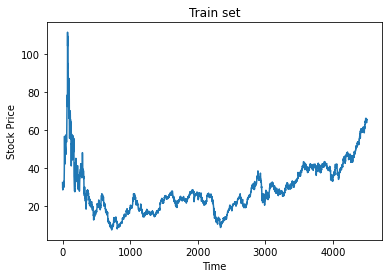

In [4]:
plt.plot(training_set)
plt.title('Train set')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

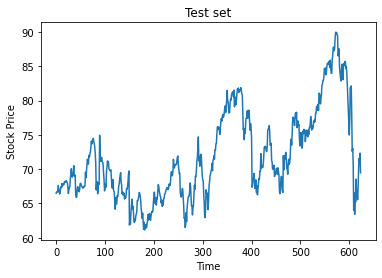

In [5]:
plt.plot(test_set)
plt.title('Test set')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

#### Normalization

In [6]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set = sc.fit_transform(training_set)
test_set = sc.transform(test_set) 

#### Use the open price of the first 14 days as the input feature(x_ train), the open price on the 15th day as the input label(y_ train)

In [7]:
x_train = []
y_train = []
 
x_test = []
y_test = []

for i in range(14, len(training_set)):
    x_train.append(training_set[i - 14:i, 0])
    y_train.append(training_set[i, 0])
    
for i in range(14, len(test_set)):
    x_test.append(test_set[i - 14:i, 0])
    y_test.append(test_set[i, 0])


In [8]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_test,  y_test  = np.array(x_test),  np.array(y_test)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test  = np.reshape(x_test,  (x_test.shape[0], x_test.shape[1], 1))

### Simple RNN model

In [9]:
model = Sequential()

# Define input layer and hidden layer with 10 neurons
model.add(SimpleRNN(units = 10, input_shape = (x_train.shape[1], 1)))

# Define linear output layer
model.add(Dense(units = 1))

# Model compilation: define optimization algorithm adam, and target function root mean square MSE
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, epochs = 20, batch_size = 64, validation_data=(x_test, y_test), validation_freq=1)

model.summary()

Epoch 1/20
71/71 [==============================] - 1s 5ms/step - loss: 0.0190 - val_loss: 0.0873
Epoch 2/20
71/71 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0222
Epoch 3/20
71/71 [==============================] - 0s 2ms/step - loss: 8.7574e-04 - val_loss: 0.0128
Epoch 4/20
71/71 [==============================] - 0s 2ms/step - loss: 5.7520e-04 - val_loss: 0.0066
Epoch 5/20
71/71 [==============================] - 0s 2ms/step - loss: 4.4220e-04 - val_loss: 0.0039
Epoch 6/20
71/71 [==============================] - 0s 2ms/step - loss: 3.9566e-04 - val_loss: 0.0026
Epoch 7/20
71/71 [==============================] - 0s 2ms/step - loss: 3.7499e-04 - val_loss: 0.0020
Epoch 8/20
71/71 [==============================] - 0s 2ms/step - loss: 3.6037e-04 - val_loss: 0.0019
Epoch 9/20
71/71 [==============================] - 0s 2ms/step - loss: 3.4786e-04 - val_loss: 0.0017
Epoch 10/20
71/71 [==============================] - 0s 2ms/step - loss: 3.3475e-04 - val_

#### Plot the loss curves

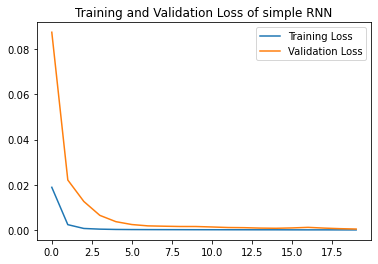

In [10]:
plt.plot(history.history['loss']    , label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss of simple RNN')
plt.legend()
plt.show()

#### Plot the predict curves

20/20 [==============================] - 0s 870us/step


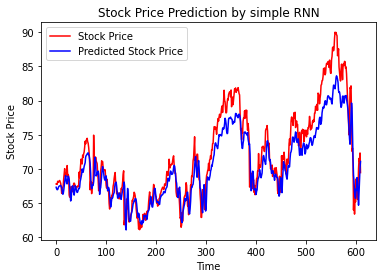

In [11]:
predicted_stock_price = model.predict(x_test) # Predict the test data
predicted_stock_price = sc.inverse_transform(predicted_stock_price) # Restore predict data
real_stock_price = sc.inverse_transform(test_set[14:]) # Restore the real data
 
# Draw a comparison curve between real data and predicted data
plt.plot(real_stock_price, color='red', label='Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction by simple RNN')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [12]:
MSE = metrics.mean_squared_error(predicted_stock_price, real_stock_price)
RMSE = metrics.mean_squared_error(predicted_stock_price, real_stock_price)**0.5
MAE = metrics.mean_absolute_error(predicted_stock_price, real_stock_price)
R2 = metrics.r2_score(predicted_stock_price, real_stock_price)
 
print('MSE:', MSE)
print('RMSE:', RMSE)
print('MAE:', MAE)
print('R2:', R2)

MSE: 6.7861765004353325
RMSE: 2.605029078616078
MAE: 2.0298861394163037
R2: 0.7286634015201079


### LSTM

In [13]:
model = Sequential()

# Define input layer and hidden layer with 10 neurons
model.add(LSTM(units=10, activation='relu',input_shape=(x_train.shape[1], 1)))

# Define linear output layer
model.add(Dense(units=1))

# Model compilation
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test), validation_freq=1)

model.summary()

Epoch 1/20
71/71 [==============================] - 1s 5ms/step - loss: 0.0222 - val_loss: 0.0619
Epoch 2/20
71/71 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 4.8359e-04
Epoch 3/20
71/71 [==============================] - 0s 3ms/step - loss: 3.3131e-04 - val_loss: 6.8084e-04
Epoch 4/20
71/71 [==============================] - 0s 3ms/step - loss: 3.1890e-04 - val_loss: 7.6891e-04
Epoch 5/20
71/71 [==============================] - 0s 3ms/step - loss: 3.1262e-04 - val_loss: 6.8913e-04
Epoch 6/20
71/71 [==============================] - 0s 3ms/step - loss: 3.0064e-04 - val_loss: 7.3176e-04
Epoch 7/20
71/71 [==============================] - 0s 3ms/step - loss: 2.9929e-04 - val_loss: 3.9503e-04
Epoch 8/20
71/71 [==============================] - 0s 3ms/step - loss: 2.8646e-04 - val_loss: 4.8082e-04
Epoch 9/20
71/71 [==============================] - 0s 3ms/step - loss: 2.8202e-04 - val_loss: 4.2945e-04
Epoch 10/20
71/71 [==============================] - 0s 3m

#### Plot the loss curves

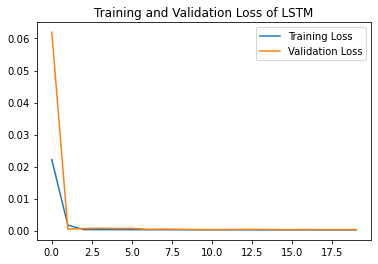

In [14]:
plt.plot(history.history['loss']    , label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss of LSTM')
plt.legend()
plt.show()

#### Plot the predict curves

20/20 [==============================] - 0s 1ms/step


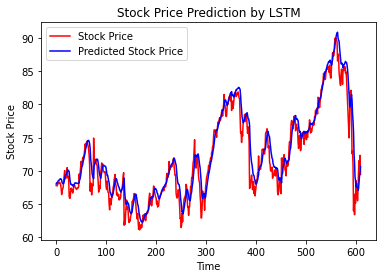

In [15]:
predicted_stock_price = model.predict(x_test)# Predict the test data
# Restore the data
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Draw a comparison curve between real data and predicted data
plt.plot(real_stock_price, color='red', label='Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction by LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [16]:
MSE = metrics.mean_squared_error(predicted_stock_price, real_stock_price)
RMSE = metrics.mean_squared_error(predicted_stock_price, real_stock_price)**0.5
MAE = metrics.mean_absolute_error(predicted_stock_price, real_stock_price)
R2 = metrics.r2_score(predicted_stock_price, real_stock_price)

print('MSE:', MSE)
print('RMSE:', RMSE)
print('MAE:', MAE)
print('R2:', R2)

MSE: 3.8753873580254923
RMSE: 1.968600355081115
MAE: 1.370348702102411
R2: 0.9083963149205867
